<h1>Color Classification using Histogram Color Classifier</h1>

In this example we train a simple algorithm to classify images using histogram color classifier. For a detailed explanation visit this <a href="https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html">link</a>.

In [1]:
#Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepgaze.color_classification import HistogramColorClassifier

Define classifier instance 

In [2]:
my_classifier = HistogramColorClassifier(channels=[0, 1, 2], hist_size=[128, 128, 128], hist_range=[0, 256, 0, 256, 0, 256], hist_type='BGR')

Read image instances we would want to classify 

In [3]:
BASE_PATH="Data/Color_Classification/"
models=[]
names=["Flash","Batman","Hulk","Superman","Captain America","Wonder Woman","Iron Man","Wolverine"]

for i in range(1,9):
    
    models.append(cv2.imread('Data/Color_Classification/model_'+str(i)+'.png'))
    

Train the classifier instance with the read images

In [4]:
for model,name in zip(models,names):
    
    my_classifier.addModelHistogram(model,name=name)

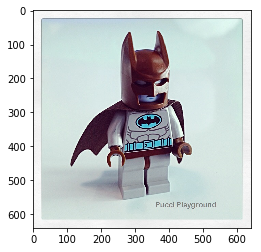

In [5]:
image=cv2.imread('Data/Color_Classification/image_2.jpg')
plt.imshow(image)
plt.show()

When first comparison is made the value of latest comparison is cached allowing user to user to directly call the function. The cached values are overwritten with every comparison 

In [6]:
comparison_array = my_classifier.returnHistogramComparisonArray(image, method="intersection")

In [7]:
print(my_classifier.returnBestMatchName())

Batman


In [8]:
my_classifier.returnHistogramComparisonProbability(output_type=dict)

{'Batman': 0.3562100322915755,
 'Captain America': 0.22106232161848274,
 'Flash': 0.0052641072198322545,
 'Hulk': 0.079750510260610211,
 'Iron Man': 0.063450289779704613,
 'Superman': 0.04972536403038804,
 'Wolverine': 0.14307651250977435,
 'Wonder Woman': 0.081460862289632271}

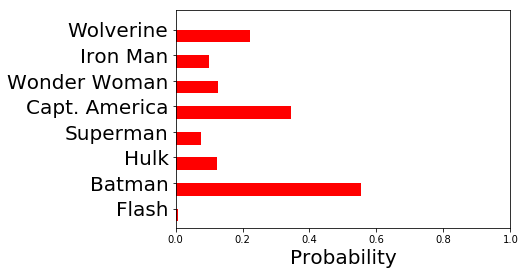

In [30]:

total_objects = 8
label_objects = ('Flash', 'Batman', 'Hulk', 'Superman', 'Capt. America', 'Wonder Woman', 'Iron Man', 'Wolverine')
font_size = 20
width = 0.5 
plt.barh(np.arange(total_objects), comparison_array, width, color='r')
plt.yticks(np.arange(total_objects) + width/2.,label_objects , rotation=0, size=font_size)
plt.xlim(0.0, 1.0)
plt.ylim(-0.5, 8.0)
plt.xlabel('Probability', size=font_size)
plt.show()

In [32]:
def histogram_intersection(hist_1, hist_2):
    #Formula for estimating the intersection in
    #two one-dimensional histograms
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

Intersection Value: 0.313


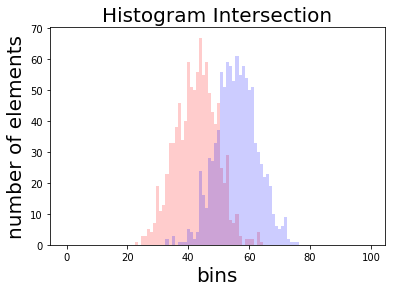

In [33]:
bins_number = 100
#Changing the mean value you can manage to get the two
#histograms. If mu_1==mu_2 then the intersection is close 
#to 1 more the two values are different more the intersection
#is close to zero.
mu_1 = -2
mu_2 = 2
data_1 = np.random.normal(mu_1, 2.0, 1000) #RED
data_2 = np.random.normal(mu_2, 2.0, 1000) #GREEN
hist_1, bin_edges_1 = np.histogram(data_1, bins=bins_number, range=[-15, 15])
hist_2, bin_edges_2 = np.histogram(data_2, bins=bins_number, range=[-15, 15])

#Find the intersection and print the value
intersection = histogram_intersection(hist_1, hist_2)
print("Intersection Value: " + str(intersection))

#Display the graph using matplotlib
font_size = 20
plt.bar(np.arange(bins_number), hist_1, 1, color='r', alpha=0.2)
plt.bar(np.arange(bins_number), hist_2, 1, color='b', alpha=0.2)
plt.title("Histogram Intersection", size=font_size)
plt.xlabel('bins', size=font_size)
plt.ylabel('number of elements', size=font_size)
plt.show()